# Transformación de las variables para conseguir una relación no lineal

In [1]:
import pandas as pd

In [5]:
data_auto = pd.read_csv("/home/diego/Documentos/Developer/Python/Scripts/MachineLearning/Curso_JG_Gomila/datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [6]:
data_auto.shape

(406, 9)

In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

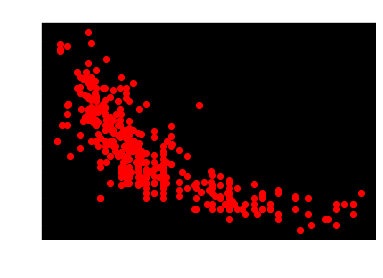

In [9]:
#%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón")
plt.title("CV vs MPG")

## Modelo de regresión lineal
* mpg = a + b * horsepower

In [19]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:, np.newaxis]

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
type(X)

pandas.core.series.Series

In [21]:
type(X_data)

numpy.ndarray

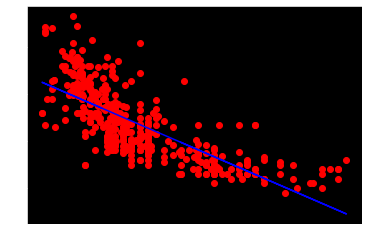

In [22]:
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [23]:
lm.score(X_data, Y)

0.5746533406450252

In [24]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(X_data)-1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, y_mean, error*100

(10315.751960060918, 5.046879480825511, 23.514572864321607, 21.462773361633474)

## Modelo de regresión cuadrático
* mpg = a + b * horsepower^2

In [25]:
X_data = X**2
X_data = X_data[:, np.newaxis]

In [26]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lm.score(X_data, Y)

0.4849887034823205

In [28]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(X_data)-1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.514572864321607, 23.616889852998113)

## Modelo de regresión lineal y cuadrático
* mpg = a + b * horsepower + c * horsepower²

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [30]:
poly = PolynomialFeatures(degree=2)

In [31]:
X_data = poly.fit_transform(X[:, np.newaxis])

In [32]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lm.score(X_data, Y)

0.6439066584257469

In [35]:
lm.intercept_

55.026192447081144

In [36]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

### mpg = 55.026 - 0.434 hp + 0.00112615 hp²

In [46]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - lm.predict(X_data))**2)
    RSE = np.sqrt(SSD / (len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE / y_mean
    print("SSD: {}, RSE: {}, y_mean: {}, error*100: {}".format(SSD, RSE, y_mean, error*100))

In [47]:
for d in range(2, 6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado {}".format(d))
    print(lm.score(X_data, Y))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))

Regresión de grado 2
0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, y_mean: 23.514572864321607, error*100: 19.6379546619069
Regresión de grado 3
0.6444678885560744
58.44877411148572
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, y_mean: 23.514572864321607, error*100: 19.622473106036686
Regresión de grado 4
0.6467674189704502
40.096643848808654
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840092e-08]
SSD: 8566.799832491351, RSE: 4.599194731579757, y_mean: 23.514572864321607, error*100: 19.558912501268786
Regresión de grado 5
0.6547512491371934
-40.69402885502241
[ 0.00000000e+00  4.00021894e+00 -7.54802468e-02  6.19621641e-04
 -2.36220984e-06  3.41983153e-09]
SSD: 8373.171388773775, RSE: 4.546921734122058, y_mean: 23.514572864321607, error*100: 19.33661206757895


# El problema de los outliers

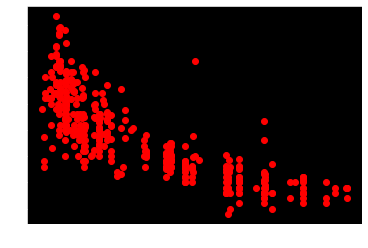

In [50]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [51]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lm.score(X, Y)

0.6261049762826918

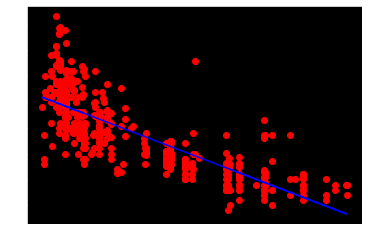

In [53]:
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X), color="blue")

In [55]:
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [57]:
data_auto[(data_auto["displacement"]>300) & (data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [58]:
data_auto_clean = data_auto.drop([395, 258, 305, 372])

In [59]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
lm.score(X, Y)

0.6466514317531822

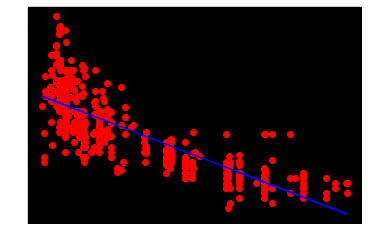

In [61]:
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X), color="blue")